# Analysis of the Categorical Variables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We Use the Cumulative Database of Objects of Interest of the Kepler Exoplanet Observatory at https://exoplanetarchive.ipac.caltech.edu/docs/data.html

In this notebook we explore the categorical variables of the dataframe

In [ ]:
# Load the exoplanet database
data_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv"
df_kepler = pd.read_csv(data_url)

Dataframe Cleaning

In [ ]:
nans_per_column=df_kepler.isna().sum(axis=0)
nans_per_column

kepid                0
kepoi_name           0
koi_disposition      0
koi_period           0
koi_impact         363
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_model_snr      363
dtype: int64

Drop All NaNs

In [ ]:
df_kepler_clean=df_kepler.dropna().reset_index(drop=True)
df_kepler_clean

,kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr
0,10797460,K00752.01,CONFIRMED,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,35.8
1,10797460,K00752.02,CONFIRMED,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,25.8
2,10811496,K00753.01,CANDIDATE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3
3,10848459,K00754.01,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6
4,10854555,K00755.01,CONFIRMED,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9
...,...,...,...,...,...,...,...,...,...,...,...
9196,10090151,K07985.01,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3
9197,10128825,K07986.01,CANDIDATE,1.739849,0.043,3.11400,48.5,0.72,1608.0,1585.81,10.6
9198,10147276,K07987.01,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,1.07,2218.0,5713.41,12.3
9199,10155286,K07988.01,CANDIDATE,333.486169,0.214,3.19900,639.1,19.30,557.0,22.68,14.0


## Filtering

In [ ]:
def filter(df,col,iqr_score):
  iqr_col=df[col].quantile(0.75)-df[col].quantile(0.25)
  filter_lower=df[col]>df[col].quantile(0.25)-(iqr_col*iqr_score)
  filter_upper=df[col]<df[col].quantile(0.75)+(iqr_col*iqr_score)
  return df[filter_lower & filter_upper]

Filtered Dataframe with respect to Planetary Radius

In [ ]:
df_filtered=df_kepler_clean.copy()
df_filtered=filter(df_kepler_clean,'koi_prad',2)

The Dataframe contains one categorical variable that indicates wether the observed object is a confirmed planet, a candidate or a false positive. In first place we count how many objects fall into each category and make a barplot

In [ ]:
object_type_counts=df_filtered['koi_disposition'].value_counts().reset_index()
object_type_counts

,index,koi_disposition
0,FALSE POSITIVE,3391
1,CONFIRMED,2736
2,CANDIDATE,1840


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Disposition')]

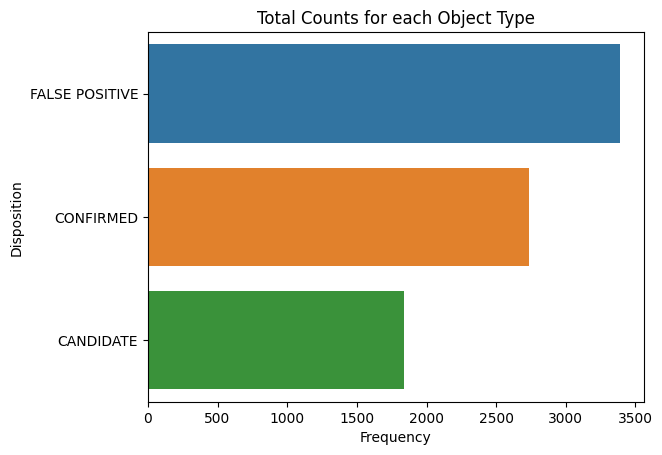

In [ ]:
ax=sns.barplot(data=object_type_counts,x='koi_disposition', y='index', orient='h')
ax.set_title('Total Counts for each Object Type')
ax.set(xlabel='Frequency',ylabel='Disposition')

## Disposition as a function of planet radius

Our goal is to find out if there is a difference between the distribution of the radii of the different classes of objects, we start by visualizing them.

[Text(0.5, 0, 'Object Disposition'), Text(0, 0.5, 'Radius (Earth Radii)')]

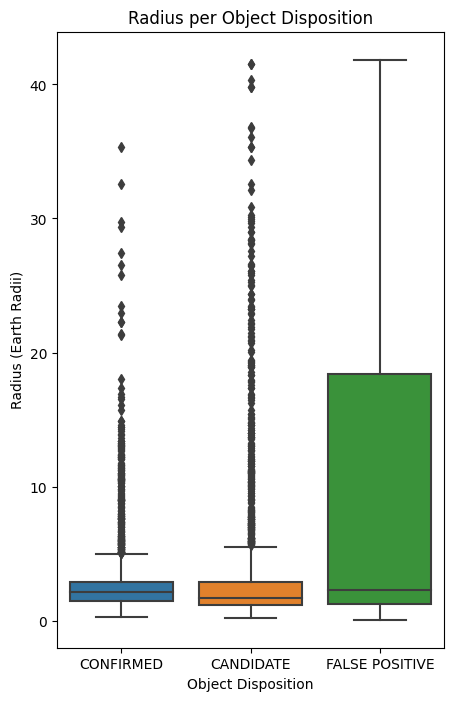

In [ ]:
plt.figure(figsize=(5,8))
ax1=sns.boxplot(data=df_filtered, x='koi_disposition', y='koi_prad')
ax1.set_title('Radius per Object Disposition')
ax1.set(xlabel='Object Disposition', ylabel='Radius (Earth Radii)')

[Text(0.5, 0, 'Object Disposition'), Text(0, 0.5, 'Radius (Earth Radii)')]

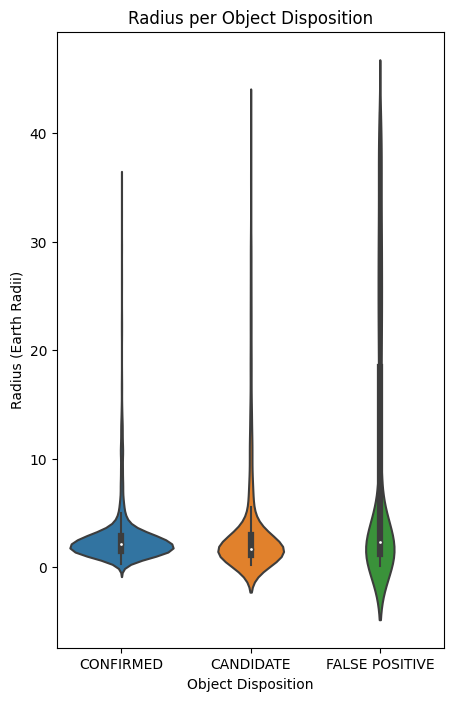

In [ ]:
plt.figure(figsize=(5,8))
ax1=sns.violinplot(data=df_filtered, x='koi_disposition', y='koi_prad')
ax1.set_title('Radius per Object Disposition')
ax1.set(xlabel='Object Disposition', ylabel='Radius (Earth Radii)')

We extract the data for the CONFIRMED, CANDIDATE, and FALSE POSITIVE classes

In [ ]:
confirmed=df_filtered[df_filtered['koi_disposition']=='CONFIRMED']
candidate=df_filtered[df_filtered['koi_disposition']=='CANDIDATE']
false_positive=df_filtered[df_filtered['koi_disposition']=='FALSE POSITIVE']

In [ ]:
confirmed_radius=confirmed['koi_prad']
candidate_radius=candidate['koi_prad']
false_positive_radius=false_positive['koi_prad']

In [ ]:
from scipy.stats import trim_mean

In [ ]:
print(f'The 20% truncated mean for the category CONFIRMED is {trim_mean(confirmed_radius,0.2)}')
print(f'The 20% truncated mean for the category CANDIDATE is {trim_mean(candidate_radius,0.2)}')
print(f'The 20% truncated mean for the category FALSE POSITIVE is {trim_mean(false_positive_radius,0.2)}')

The 20% truncated mean for the category CONFIRMED is 2.1725334957369062
The 20% truncated mean for the category CANDIDATE is 1.856014492753623
The 20% truncated mean for the category FALSE POSITIVE is 5.468044226044227


The means of CONFIRMED and CANDIDATE are very close, we inspect also their standard deviations

In [ ]:
print(f'The standard deviation for the category CONFIRMED is {confirmed_radius.std()}')
print(f'The standard deviation for the category CANDIDATE is {candidate_radius.std()}')

The standard deviation for the category CONFIRMED is 2.741716378491145
The standard deviation for the category CANDIDATE is 5.6432814033188805


Test: Null Hypothesis.- The trimmed means of the radii of the CONFIRMED and CANDIDATE classes is the same, but with different variances

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_statistic, p_value=ttest_ind(confirmed_radius,candidate_radius,equal_var=False, trim=0.2)

We adopt a Confidence Interval of 99%. If p_value<0.005, we reject the Null Hypothesis

In [ ]:
print(f'T-statistic: {t_statistic}')
print(f'p-value: {p_value}')

T-statistic: 7.509396631467353
p-value: 9.199520617121589e-14


We reject the Null Hypothesis

New Null-Hypothesis: The trimmed mean of the radii of the CONFIRMED class is larger than that of the  CANDIDATE class

In [ ]:
t_statistic_2, p_value_2=ttest_ind(confirmed_radius,candidate_radius,equal_var=False, trim=0.2,alternative='less')

In [ ]:
print(f'T-statistic: {t_statistic_2}')
print(f'p-value: {p_value_2}')

T-statistic: 7.509396631467353
p-value: 0.999999999999954
